In [24]:
using DataFrames
using Gadfly
using Cairo
using Compose
set_default_plot_size(40cm, 14cm)

home = "/home/german/labo/18/egfr/rg/"
home_gram = "/home/german/labo/18/egfr/renonmis_gram/"
home_modos = "/home/german/labo/18/egfr/modos/"
home_rtdos = "/home/german/labo/18/egfr/rtdos_log/"
aa = 277
aa_3 = 277 * 3
aa_36 = aa_3 - 6

825

# Bfactor

In [35]:
tmp = readdlm(string(home_rtdos, "mean_bfacs_im"))
mean_bfacs_im = reshape(tmp, length(tmp))

tmp = readdlm(string(home_rtdos, "mean_bfacs_am"))
mean_bfacs_am = reshape(tmp, length(tmp))

df_mean_bfacs = DataFrame(Value = [mean_bfacs_im ./ mean_bfacs_im[1] ; mean_bfacs_am ./ mean_bfacs_am[1]],
    Modes = [ collect(1:aa_36) ; collect(1:aa_36) ],
    Conformer = [ fill("IM", length(mean_bfacs_im)) ; fill("AM", length(mean_bfacs_am)) ]);

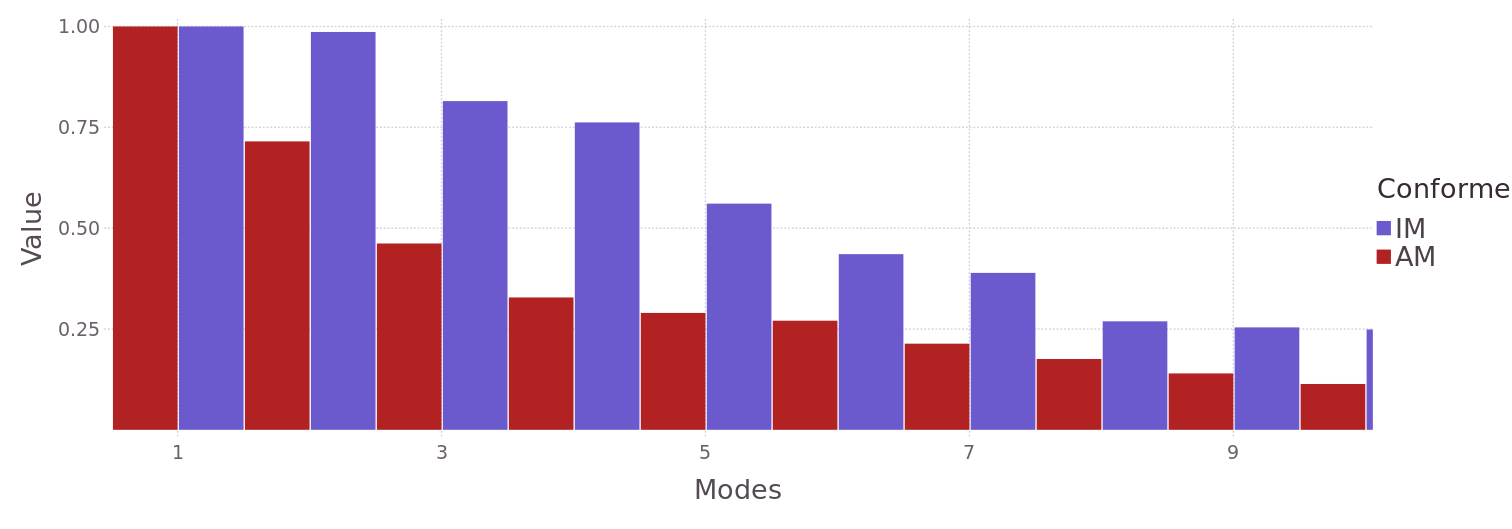

In [38]:
pdf_mean_bfacs = plot(df_mean_bfacs, x="Modes", y="Value", color = "Conformer", 
    Geom.bar(position = :dodge),

    #Guide.title("Figure 2.AA"),
    #Guide.ylabel("δV * Probability", orientation=:vertical), 
    Guide.yticks(ticks = collect(0.25:0.25:1.0)),
    Guide.xticks(ticks = collect(1:2:10)),
    Coord.cartesian(xmin = 0.5, xmax = 10),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),


    Theme(bar_spacing = 2pt, grid_line_width=1pt, key_label_font_size = 20pt,
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

# Bfactor correlación

In [47]:
tmp = readdlm(string(home_rtdos, "cor_bf_im"))
cor_bf_im = reshape(tmp, length(tmp))
cor_bf_im = cor_bf_im[cor_bf_im .!= 0];

tmp = readdlm(string(home_rtdos, "cor_bf_am"))
cor_bf_am = reshape(tmp, length(tmp))
cor_bf_am = cor_bf_am[cor_bf_am .!= 0];

df_cor_bf = DataFrame(ρB = [cor_bf_im ; cor_bf_am],
    Conformer = [ fill("IM", length(cor_bf_im)) ; fill("AM", length(cor_bf_am)) ]);

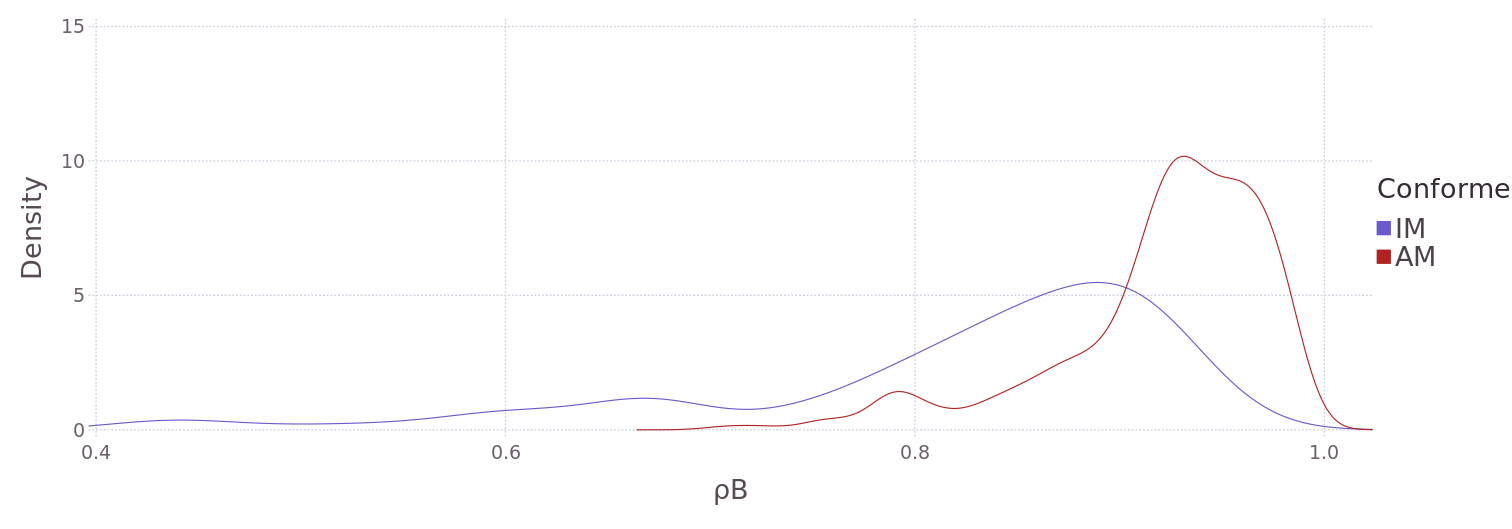

In [64]:
pdf_hist_der_vec1 = plot(df_cor_bf, x="ρB", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    #Guide.yticks(ticks = collect(0.25:0.25:1.0)),
    Coord.cartesian(xmin = 0.4, xmax = 1.02),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),


    Theme(bar_spacing = 2pt, grid_line_width=1pt, key_label_font_size = 20pt,
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

# Zeta y ND

In [71]:
# IM
tmp = readdlm(string(home_rtdos, "zeta_im"))[2:end, :]
zeta_im = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "nd_im"))[2:end, :]
nd_im = reshape(tmp, length(tmp))

# AM
tmp = readdlm(string(home_rtdos, "zeta_am"))[2:end, :]
zeta_am = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "nd_am"))[2:end, :]
nd_am = reshape(tmp, length(tmp))

df_zeta = DataFrame(ζ = [zeta_im ; zeta_am],
    Conformer = [ fill("IM", length(zeta_im)) ; fill("AM", length(zeta_am)) ]);

df_nd = DataFrame(ND = [nd_im ; nd_am],
    Conformer = [ fill("IM", length(zeta_im)) ; fill("AM", length(zeta_am)) ]);

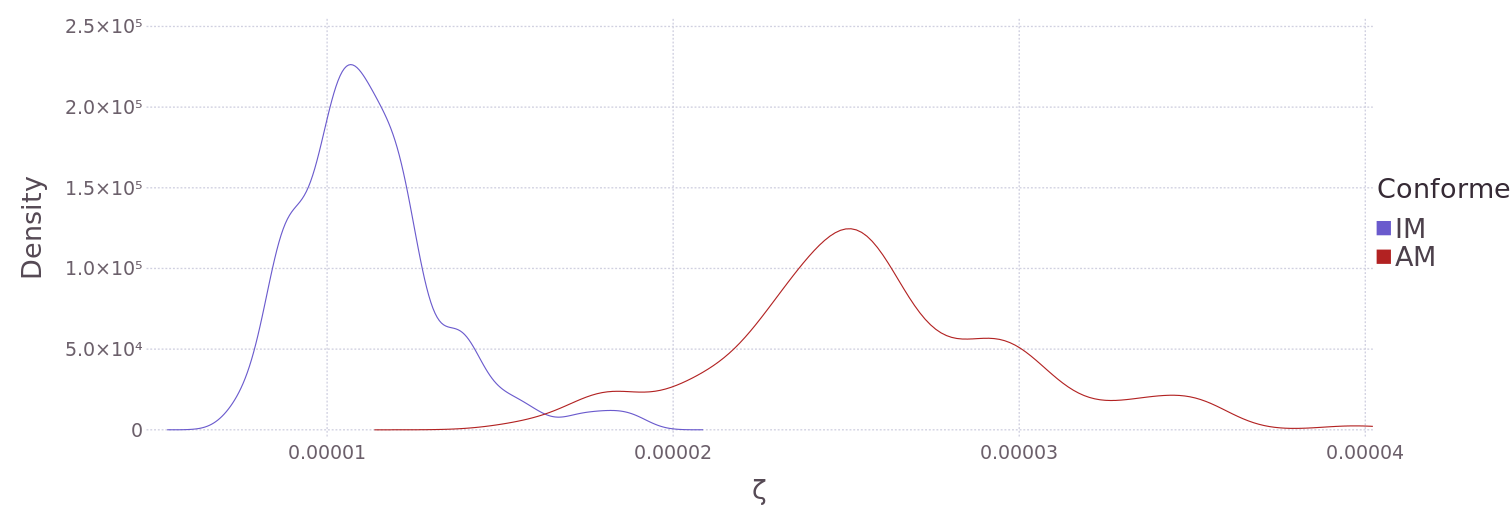

In [75]:
pdf_zeta = plot(df_zeta, x="ζ", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    #Guide.yticks(ticks = collect(0.25:0.25:1.0)),
    Coord.cartesian(xmin = 5e-6, xmax = 4e-5),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),


    Theme(bar_spacing = 2pt, grid_line_width=1pt, key_label_font_size = 20pt,
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

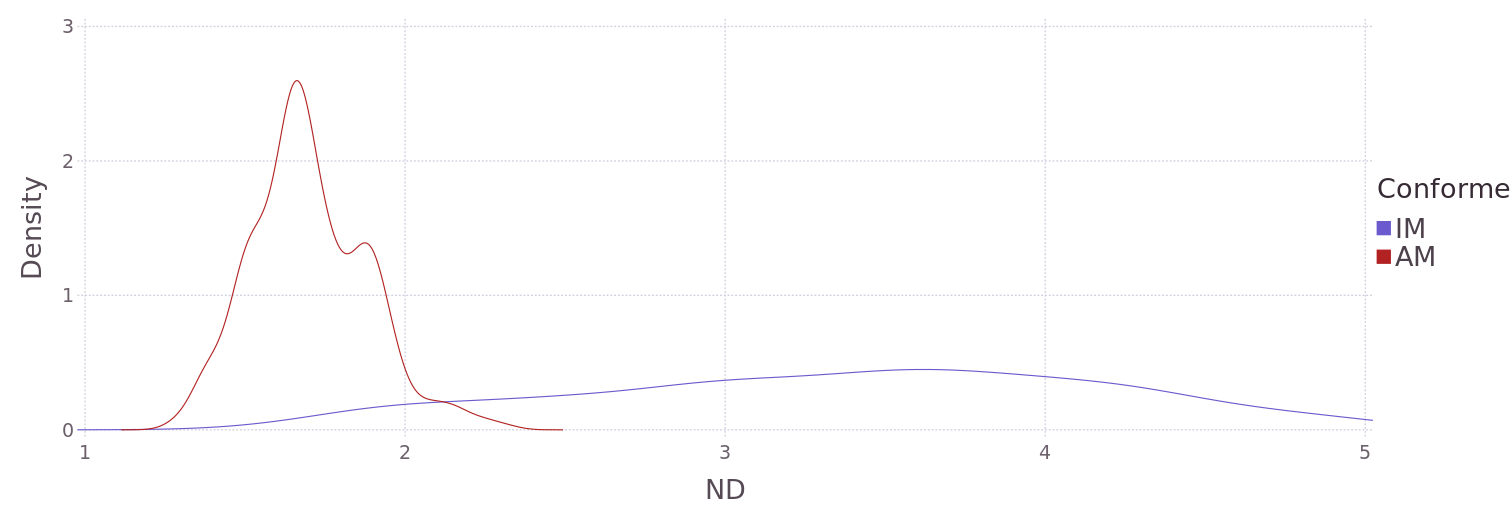

In [76]:
pdf_nd = plot(df_nd, x="ND", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    #Guide.yticks(ticks = collect(0.25:0.25:1.0)),
    Coord.cartesian(xmin = 1.0, xmax = 5.0),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),


    Theme(bar_spacing = 2pt, grid_line_width=1pt, key_label_font_size = 20pt,
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

# SVD

In [79]:
# IM
tmp = readdlm(string(home_rtdos, "dots_svd_im_1"))[2:end, :]
dots_svd_im_1 = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "dots_svd_im_2"))[2:end, :]
dots_svd_im_2 = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "dots_svd_im_3"))[2:end, :]
dots_svd_im_3 = reshape(tmp, length(tmp))

# AM
tmp = readdlm(string(home_rtdos, "dots_svd_am_1"))[2:end, :]
dots_svd_am_1 = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "dots_svd_am_2"))[2:end, :]
dots_svd_am_2 = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "dots_svd_am_3"))[2:end, :]
dots_svd_am_3 = reshape(tmp, length(tmp))


df_svd_1 = DataFrame(Overlap = [dots_svd_im_1 ; dots_svd_am_1],
    Conformer = [ fill("IM", length(dots_svd_im_1)) ; fill("AM", length(dots_svd_am_1)) ])

df_svd_2 = DataFrame(Overlap = [dots_svd_im_2 ; dots_svd_am_2],
    Conformer = [ fill("IM", length(dots_svd_im_2)) ; fill("AM", length(dots_svd_am_2)) ])

df_svd_3 = DataFrame(Overlap = [dots_svd_im_3 ; dots_svd_am_3],
    Conformer = [ fill("IM", length(dots_svd_im_3)) ; fill("AM", length(dots_svd_am_3)) ]);

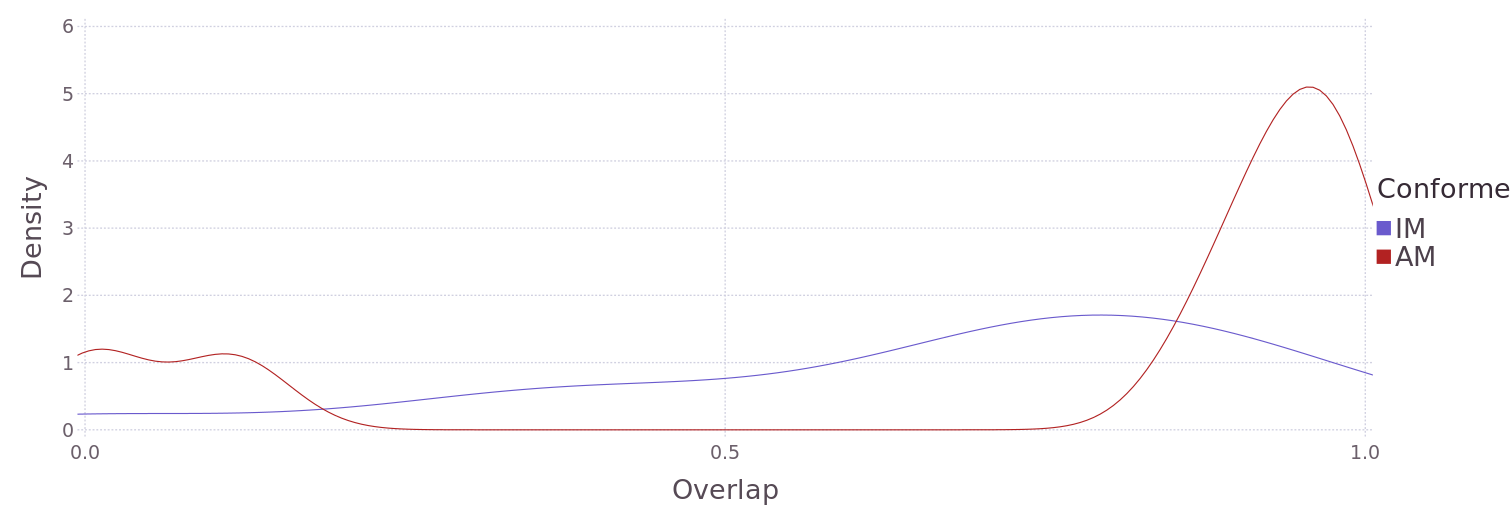

In [84]:
pdf_svd_1 = plot(df_svd_1, x="Overlap", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    #Guide.yticks(ticks = collect(0.25:0.25:1.0)),
    Coord.cartesian(xmin = 0, xmax = 1),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),


    Theme(bar_spacing = 2pt, grid_line_width=1pt, key_label_font_size = 20pt,
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

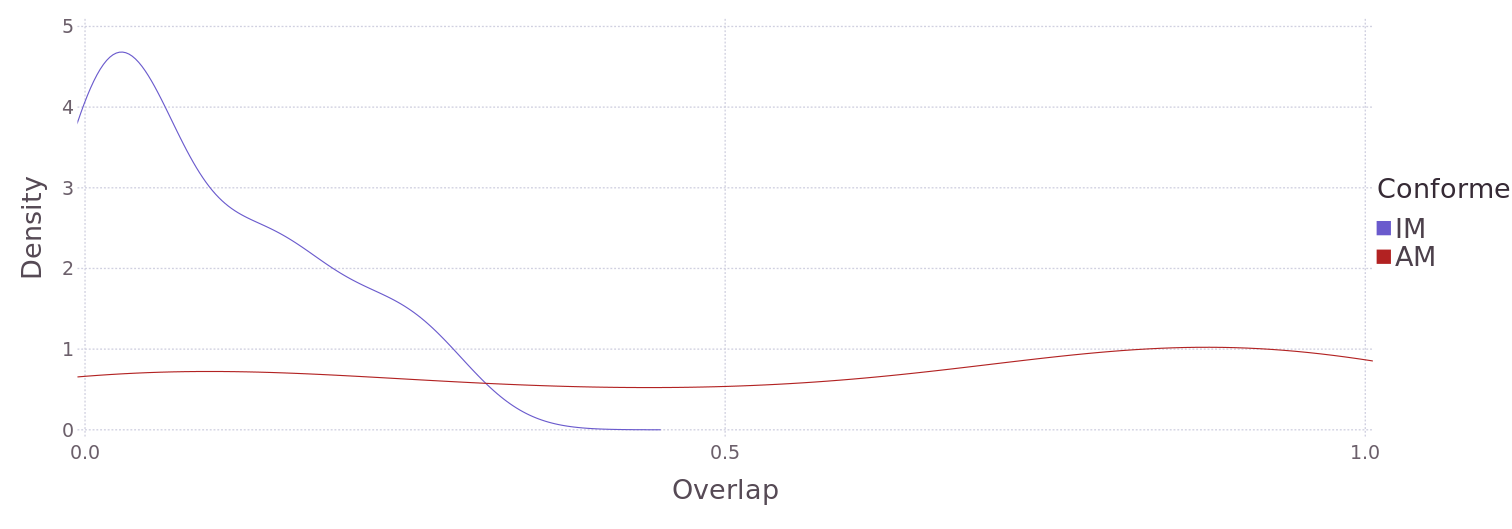

In [85]:
pdf_svd_2 = plot(df_svd_2, x="Overlap", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    #Guide.yticks(ticks = collect(0.25:0.25:1.0)),
    Coord.cartesian(xmin = 0, xmax = 1),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),


    Theme(bar_spacing = 2pt, grid_line_width=1pt, key_label_font_size = 20pt,
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

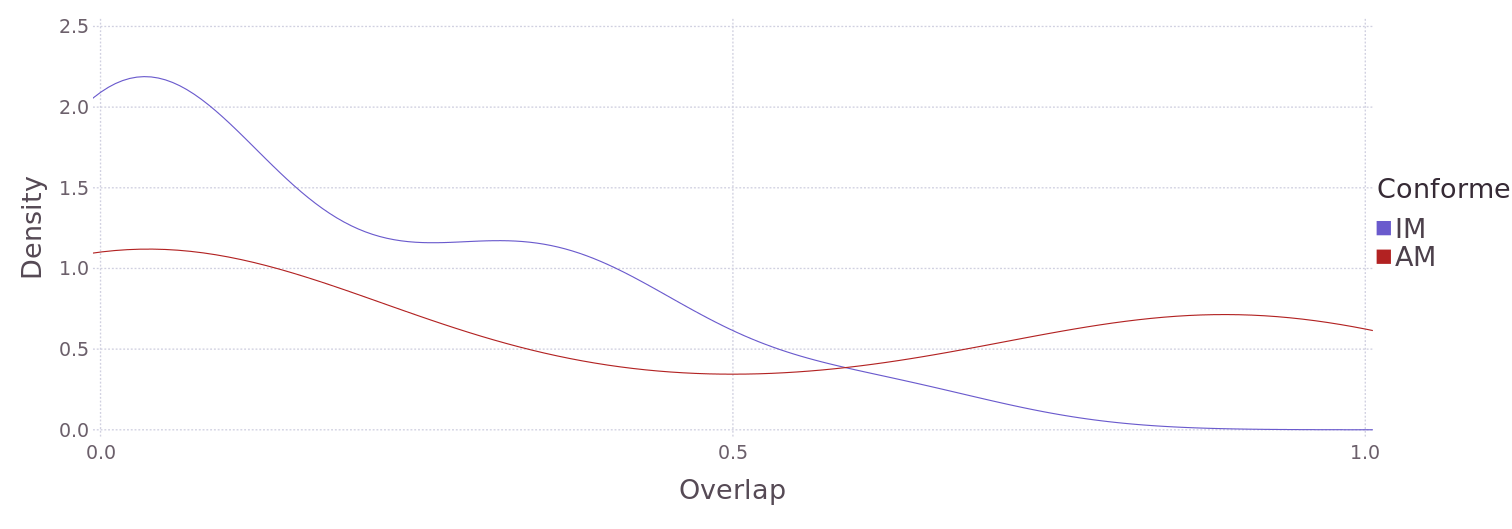

In [86]:
pdf_svd_3 = plot(df_svd_3, x="Overlap", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    #Guide.yticks(ticks = collect(0.25:0.25:1.0)),
    Coord.cartesian(xmin = 0, xmax = 1),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),


    Theme(bar_spacing = 2pt, grid_line_width=1pt, key_label_font_size = 20pt,
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

# Radio de giro

In [15]:
tmp = readdlm(string(home_rtdos, "rg_im_vec1"))
der_im_vec1 = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "rg_am_vec1"))
der_am_vec1 = reshape(tmp, length(tmp))

tmp = readdlm(string(home_rtdos, "rg_im_vec2"))
der_im_vec2 = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "rg_am_vec2"))
der_am_vec2 = reshape(tmp, length(tmp))


df_der_vec1 = DataFrame(ΔRg = [der_im_vec1 ; der_am_vec1],
    Conformer = [ fill("IM", length(der_im_vec1)) ; fill("AM", length(der_am_vec1)) ])

df_der_vec2 = DataFrame(ΔRg = [der_im_vec2 ; der_am_vec2],
    Conformer = [ fill("IM", length(der_im_vec2)) ; fill("AM", length(der_am_vec2)) ]);

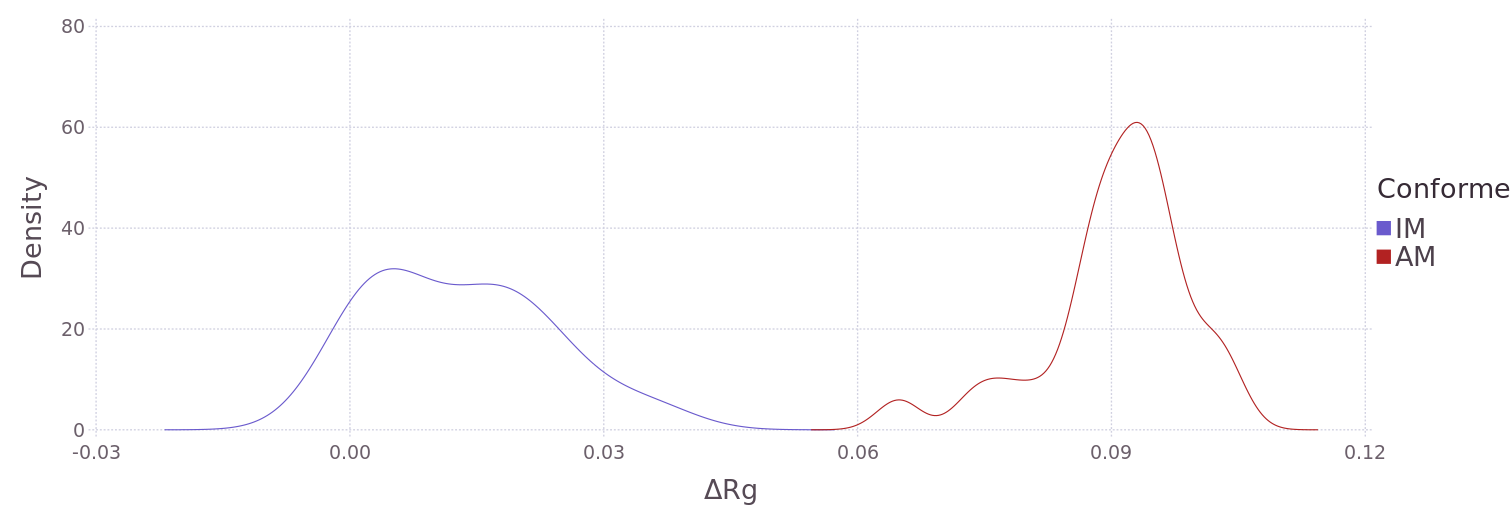

In [21]:
pdf_hist_der_vec1 = plot(df_der_vec1, x="ΔRg", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    #Guide.yticks(ticks = collect(0.25:0.25:1.0)),
    Coord.cartesian(xmin = -0.03, xmax = 0.12),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),


    Theme(bar_spacing = 2pt, grid_line_width=1pt, key_label_font_size = 20pt,
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

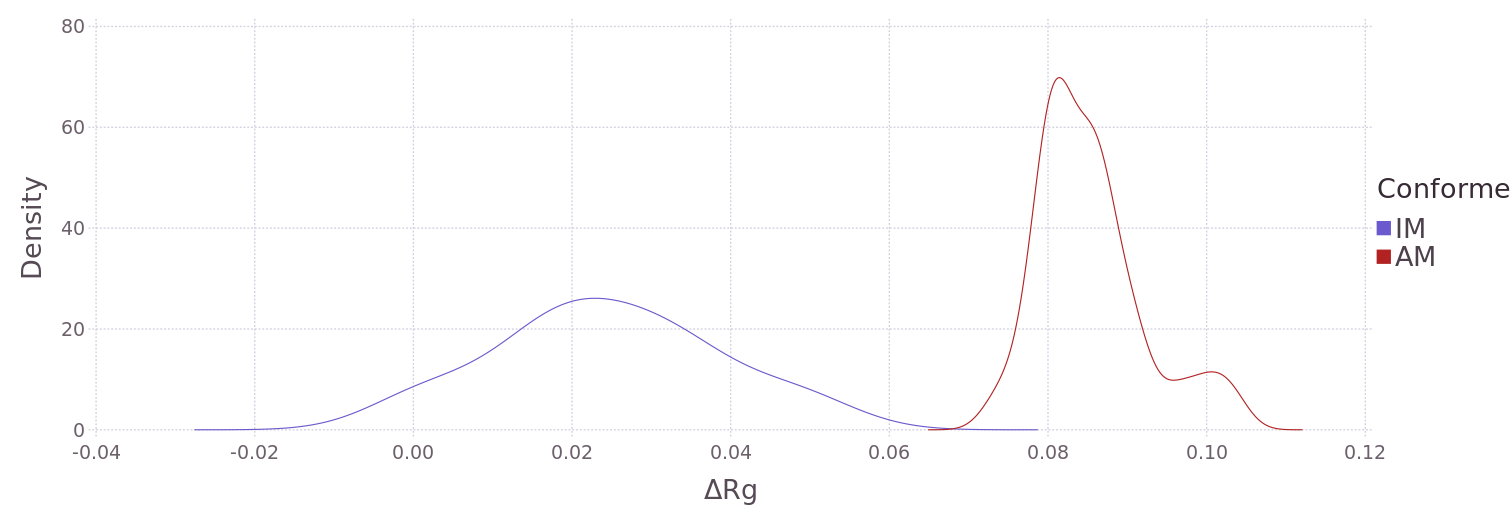

In [20]:
pdf_hist_der_vec2 = plot(df_der_vec2, x="ΔRg", color = "Conformer", 
    Geom.density,

    #Guide.title("Figure 2.AA"),
    Guide.ylabel("Density", orientation=:vertical), 
    #Guide.yticks(ticks = collect(0.25:0.25:1.0)),
    Coord.cartesian(xmin = -0.04, xmax = 0.12),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),


    Theme(bar_spacing = 2pt, grid_line_width=1pt, key_label_font_size = 20pt,
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

In [ ]:
lyr_x_ticks = layer(x =  collect(0.1:0.1:0.9), xend = collect(0.1:0.1:0.9),
            y = repeat([-0.005], inner = [9]), yend = repeat([0.005], inner = [9]),
            Geom.segment, Theme(default_color=colorant"Black"))
lyr_y_ticks = layer(y =  collect(0.1:0.1:.3), yend = collect(0.1:0.1:.3),
            x = repeat([-0.003], inner = [3]), xend = repeat([0.003], inner = [3]),
            Geom.segment, Theme(default_color=colorant"Black"))

lyr_mode_pn_whole_pnum_Whis = layer(df_mode_pn_whole_pnum_Whis, x="Pnumber", y="Probability", Geom.bar)

pdf_mode_pn_whole_pnum_Whis = plot(lyr_mode_pn_whole_pnum_Whis, lyr_x_ticks, lyr_y_ticks,
Guide.xlabel("Participation Number / Total of residues"),

Guide.annotation(compose(context(), line([(0., 0.), (0.95, 0.), ]),
Compose.stroke("gray"), Compose.fill("gray"))),
Guide.annotation(compose(context(), line([(0., 0.), (0., 0.21), ]),
Compose.stroke("gray"), Compose.fill("gray"))),

Guide.xticks(ticks = collect(0.:0.1:0.9)), Guide.yticks(ticks = collect(0.1:0.1:0.2)),
Guide.ylabel("Relative\nprobability\n", orientation=:vertical),
Coord.cartesian(xmin = -0, xmax = 0.95, ymax = 0.22), 
Theme(bar_spacing = 2pt, grid_line_width = 0pt, default_color=colorant"crimson", 
minor_label_font_size = 60pt, major_label_font_size = 64pt, key_title_font_size = 36pt))

In [ ]:
draw(PNG(out_filename_4b_fig, 120cm, 40cm), plot_4b_fig)